### Formula

Strength of Magnetic Field
$H=\dfrac{I\times N}{L}$

Ampere Force
$F=BIL$

B:Magnetic Induction

I:Current

L:length of coil

Magnetic Induction
$B=\dfrac{\mu _{0}I}{2r}$

Air Drag:
$\left| \overrightarrow{F}_{D}\right| =\dfrac{1}{2}\rho C_{D}Av^{2}$

F = drag force (Newtons)

ρ = density of fluid 

(1.27 [kg/m3] for air)

C = coefficient of drag

A = cross-sectional area

v = relative velocity

### References:  
> Blog [CN_Blog][1]  
> Blog [Blog][2]  
> A PDF document [PDF_file][runoob]  
> Article [Article][3]

  [1]: https://www.cnblogs.com/deciduousmap/p/12207566.html
  [runoob]: https://www.albany.edu/~soktyabr/NNSE508/NNSE508_EM-L2-magnetic_field.pdf
  [2]: https://www.doeeet.com/content/eee-components/passives/inductors-magnetic-induction-magnetic-flux-and-faradays-law/
  [3]: https://www.extrica.com/article/21627

### Coil Gun
>The cannon is composed of two parts: a fixed coil and a projectile coil. The electromagnetic force is generated by the mutual inductance gradient of the coaxial coil. The fixed coil acts as the barrel of the cannon, and if a strong magnetic field is generated by the passage of current, an induced current is formed in the projectile coil at the same time, so that the cannonball can be launched at a high speed by the electromagnetic force generated between the magnetic field and the induced current. The basic principle is that a charged conductor or magnetic object is propelled forward by electromagnetic force in a magnetic field. The diagram below.

![shell](markdown_img\model.jpg)
>Though in this project I only simulate for one unit of coil

### Magnetic Induction
>Magnetic field induction inside a
solenoid is determined by a number of
turns per length n and current I (no
core):  
$ \oint \overrightarrow{B}\cdot dl=\mu _{0}I$  
Shortened as  
$ B=\mu _{0}nI$  
Assume the potential difference in the circuit is stable...

### Ampere Force
>Ampere’s law of force is the “law of
action” between current carrying circuits
through magnetic field.  
Assume the magnetic filed is uniform...  
$ F=BIL$  
![img](markdown_img\Amperes.png)

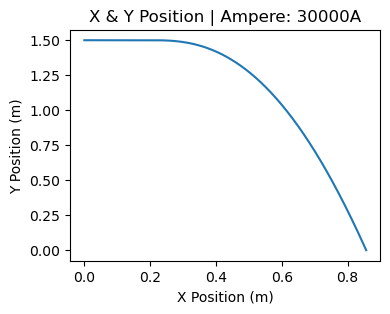

Time: 2.3289999999998545s


In [5]:
from re import X
import numpy as np

class Object:
    def __init__(self):
        self.mass = 10 #kg
        self.density = 7874 #kg/m^3
        self.volume = self.mass/self.density #volume of ball
        self.r = (0.75*self.volume*(1/3.14))**(1/3) #radius of ball
        self.velocity = 0 #m/s
        self.acc = 0 #m/s^2
        self.x = 0 #m
        self.y = 1.5 #m
        self.dt = 0.01 #s
    
    def update_object(self,mass=1,volume=1):
        self.mass = mass
        self.volume = volume
        self.density = self.mass / self.volume
        
    def update_acc(self,ampere_force,mass):
        self.acc = ampere_force / self.mass
    
    def get_surface(self):
        return 4*3.14*(self.r**2)
    
    def get_acc(self):
        return self.acc
    
    def update_velocity(self,acc):
        self.velocity += self.acc * self.dt
    
    def get_velocity(self):
        return self.velocity
    
    def update_x_pos(self,velocity):
        self.x += velocity * self.dt
    
    
    def update_x(self,x,velocity):
        self.x = self.x + (velocity * self.dt)
        
    def get_x(self):
        return self.x
    
    def update_y(self,y,time,g=9.81,):
        self.y -= self.y + 0.5*(g * (time**2))
    
    def get_y(self):
        return self.y
        
        
class Coil:
    def __init__(self):
        self.turn = 200
        self.length = 0.2 #m
        self.ampere = 30000 #A #Current #1000-50000
        self.radius = 1 #m
        
    def modify_coil(self,turn=100,length=1,radius=1):
        self.turn = turn
        self.length = length
        self.radius = radius
    
    def get_turns(self):
        return self.turn
    
    def get_ampere(self):
        return self.ampere
    
    def get_length(self):
        return self.length
    
    def get_turns(self):
        return self.turn
    
    def get_radius(self):
        return self.radius


class simulation:
    def __init__(self):
        self.mu = 4 * np.pi * 10**-7 #H/m
        self.dt = 0.001 #s
        self.air_density = 1.225 #kg/m^3
    def update_current(self, ampere=1):
        self.ampere = ampere
    
    def get_magnetic_induction(self,ampere,length=0.1,turn=200):
        # self.B = (self.mu * ampere) / (2 * np.pi * radius)
        self.B = self.mu * (length / turn) * ampere
        return self.B
    
    def get_ampere_force(self,B,ampere,length):
        self.ampere_force = self.B * ampere * length
        return self.ampere_force
    
    def gravity_force(self,mass):
        self.g = 9.8 #m/s^2
        return mass * self.g
    
    def air_drag(self,velocity,area):
        self.air_drag = 0.5 * self.air_density * (velocity**2) * area
        return self.air_drag
  
def run():
    sim = simulation()
    coil = Coil()
    object = Object()
    
    #DATA COLLECTION
    posi = []
    X_DATA = []
    Y_DATA = [] 
    MI_DATA = []
    AF_DATA = []
    VEL_DATA = []
    ACC_DATA = []
    time = 0
    
    pos = object.get_x()
    vel = object.get_velocity()
    acc = object.get_acc()
    
    turns = coil.get_turns()
    length = coil.get_length()
    global ampere
    ampere = coil.get_ampere()
    radius = coil.get_radius()
    
    while pos < length:
        x = object.get_x()
        y = object.get_y()
        posi.append(pos)
        ACC_DATA.append(acc)
        VEL_DATA.append(vel)
        X_DATA.append(pos)
        Y_DATA.append(object.get_y())
        
        MI = sim.get_magnetic_induction(ampere,radius)
        AF = sim.get_ampere_force(MI,ampere,length)
        
        object.update_acc(AF,object.mass)
        acc = object.get_acc()
        object.update_velocity(acc)
        vel = object.get_velocity()
        object.update_x_pos(vel)
        pos = object.get_x()
        time += sim.dt
    
    time_t = 0
    gAcc = 0
    hAcc = ACC_DATA[-1]
    XPosition = X_DATA[-1]
    xVelocity = object.get_velocity()
    gVelocity = 0
    height = object.get_y()
    while height > 0:
        area = object.get_surface()
        dragForce_v = object.density * sim.air_density * 0.5 * 0.001 * (gVelocity**2)
        gravity = object.mass * 0.981
        gAcc += ((gravity-dragForce_v) / object.mass) * sim.dt
        #Cal the horizontal drag force
        dragForce = object.density * sim.air_density * 0.5 * 0.001 * (xVelocity**2)
        hAcc -= (dragForce / object.mass) * sim.dt
        #Update velocity and position
        gVelocity = gVelocity + gAcc * 0.001
        height = height - gVelocity * 0.001
        Y_DATA.append(height)
        #Store data to list
        xVelocity = xVelocity + hAcc * 0.001
        XPosition = XPosition + xVelocity * 0.001
        X_DATA.append(XPosition)
        time += 0.001

    
    x = np.arange(0,time-sim.dt,sim.dt)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,3))
    plt.plot(X_DATA,Y_DATA)
    text = "Ampere: " + str(ampere) + "A"
    plt.title("X & Y Position | " + text)
    plt.xlabel('X Position (m)')
    plt.ylabel("Y Position (m)")
    plt.show()
    print(f"Time: {time}s")
run()

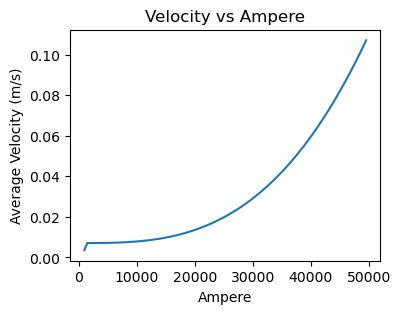

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def run_vel_cur():
    sim = simulation()
    coil = Coil()
    object = Object()
    
    #DATA COLLECTION
    posi = []
    X_DATA = []
    Y_DATA = [] 
    VEL_DATA = []
    ACC_DATA = []
    AVG_VEL_DATA = []
    AMP_DATA = []
    time = 0
    
    pos = object.get_x()
    vel = object.get_velocity()
    acc = object.get_acc()
    
    turns = coil.get_turns()
    length = coil.get_length()
    ampere = coil.get_ampere()
    radius = coil.get_radius()
    for i in range(1000,50000,500):
        ampere = i #A #Current #1000-50000
        pos = 0
        VEL_DATA = []
        ACC_DATA = []
        while pos < length:
            x = object.get_x()
            y = object.get_y()
            posi.append(pos)
            ACC_DATA.append(acc)
            VEL_DATA.append(vel)
            X_DATA.append(pos)
            Y_DATA.append(object.get_y())
            
            MI = sim.get_magnetic_induction(ampere,radius)
            AF = sim.get_ampere_force(MI,ampere,length)
            
            object.update_acc(AF,object.mass)
            acc = object.get_acc()
            object.update_velocity(acc)
            vel = object.get_velocity()
            object.update_x_pos(vel)
            pos = object.get_x()
            time += sim.dt
            
        AVG_VEL = sum(VEL_DATA) / len(VEL_DATA)
        AVG_VEL_DATA.append(AVG_VEL)
        AMP_DATA.append(ampere)
    return AVG_VEL_DATA, AMP_DATA    
    
data = run_vel_cur()
AVG_VEL_DATA = data[0]
AMP_DATA = data[1]
plt.figure(figsize=(4,3))
plt.plot(AMP_DATA,AVG_VEL_DATA)
plt.title("Velocity vs Ampere")
plt.ylabel("Average Velocity (m/s)")
plt.xlabel("Ampere")
plt.show()

### Engergy
>Electrical Energy refers to the work done by eletric in any form.
